In [2]:
#1. Get data/indicators
#2. Define Strategy
#3. Test Strategy


import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Price,Adj Close,Close,High,Low,Open,Volume,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,
2025-03-17,563.782349,567.150024,569.710022,562.349976,562.789978,49008700,566.529999,588.484072,-1.0,0.007711,-0.007711
2025-03-18,557.688721,561.020020,565.020020,559.059998,564.799988,66041400,564.946002,586.806295,-1.0,-0.003180,0.003014
2025-03-19,563.762451,567.130005,570.950012,561.630005,562.830017,66556000,563.353003,585.560368,-1.0,0.007676,-0.007910
2025-03-20,562.132141,565.489990,570.570007,562.599976,563.330017,62958200,562.631000,584.102591,-1.0,0.004762,-0.005041
2025-03-21,562.317627,563.979980,564.890015,558.030029,559.280029,83763000,561.437000,582.571850,-1.0,0.002079,-0.002384
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-24,606.780029,606.780029,607.849976,603.409973,604.330017,67735300,600.405011,594.681116,1.0,0.078126,0.069627
2025-06-25,607.119995,607.119995,608.609985,605.539978,607.909973,62114800,600.809009,595.298152,1.0,0.078730,0.070226
2025-06-26,611.869995,611.869995,612.309998,608.369995,608.989990,78548400,601.860010,595.952596,1.0,0.087170,0.078599


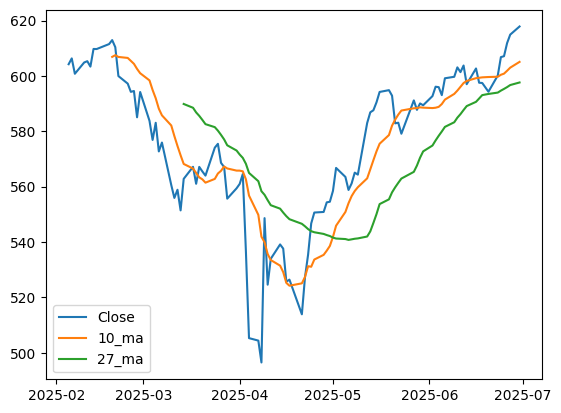

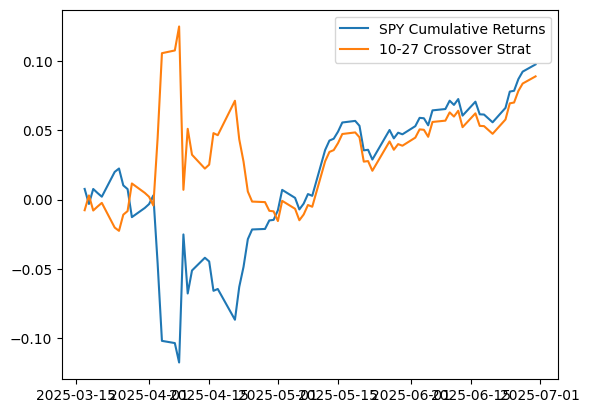

In [3]:
#MOVING AVERAGES, add a strategy to see when faster one corsses the slow one
#swing trading, trend following

#Go long when fast MA crosses above slow MA → bullish crossover.
#Go short when fast MA crosses below slow MA → bearish crossover
#If the fast MA rises above the slow MA, recent prices are stronger than long-term trend → possible uptrend forming → go long.


TICKER = 'SPY'
FAST = 10
SLOW = 27
LOOKBACK = 100

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(
        ticker,
        start='1993-01-29',
        end='2025-07-01',
        interval='1d',
        auto_adjust=False,
        progress=False,
        threads=False
    )
    return df.dropna().iloc[-lookback:, :]





def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()

    

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])

    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])

    return df.dropna()

def add_strategy(df, fast, slow):
    df.columns = df.columns.get_level_values(0)

    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1,-1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df


def test_strategy(df, ticker, fast, long):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change()*df['Strategy']).cumprod() - 1
    

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    
    plt.legend([f'{ticker} Cumulative Returns', f'{fast}-{long} Crossover Strat'])

    return df.dropna()



df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, TICKER, FAST, SLOW)

df

